In [1357]:
#Part 1

In [1358]:
#Step 1

In [1359]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urlparse
import pandas as pd
import numpy as np

In [1360]:
res = requests.get("https://cmsc320.github.io/files/top-50-solar-flares.html")
#get request

In [1361]:
root = BeautifulSoup(res.content)

In [1362]:
a = root.find("table")

In [1363]:
b = a.prettify()

In [1364]:
all_frames = pd.read_html(b)
#use read_html to parser the html file

In [1365]:
all_frames[0].columns = ['rank', 'x_classification', 'date', 'region', 'start_time', 'maximum_time', 'end_time', 'movie']
df = pd.DataFrame(all_frames[0])
#Build a dataframe

In [1366]:
df

,rank,x_classification,date,region,start_time,maximum_time,end_time,movie
0,1,X28+,2003/11/04,486,19:29,19:53,20:06,Movie View archive
1,2,X20+,2001/04/02,9393,21:32,21:51,22:03,Movie View archive
2,3,X17.2+,2003/10/28,486,09:51,11:10,11:24,Movie View archive
3,4,X17+,2005/09/07,808,17:17,17:40,18:03,Movie View archive
4,5,X14.4,2001/04/15,9415,13:19,13:50,13:55,Movie View archive
5,6,X10,2003/10/29,486,20:37,20:49,21:01,Movie View archive
6,7,X9.4,1997/11/06,8100,11:49,11:55,12:01,Movie View archive
7,8,X9.3,2017/09/06,2673,11:53,12:02,12:10,Movie View archive
8,9,X9,2006/12/05,930,10:18,10:35,10:45,Movie View archive
9,10,X8.3,2003/11/02,486,17:03,17:25,17:39,Movie View archive


In [1367]:
#Step 2

In [1368]:
df2 = df
df2 = df2.drop(['movie'],axis = 1)
#remove movie as mentioned in description

In [1369]:
df2['start_datetime'] = pd.to_datetime(
                          df2['date'] + ' ' + df2['start_time'])
df2['max_datetime'] = pd.to_datetime(
                          df2['date'] + ' ' + df2['maximum_time'])
df2['end_datetime'] = pd.to_datetime(
                          df2['date'] + ' ' + df2['end_time'])
#Create three datetime columns by to_datetime
df2 = df2.drop(['date'],axis = 1)
df2 = df2.drop(['start_time'],axis = 1)
df2 = df2.drop(['maximum_time'],axis = 1)
df2 = df2.drop(['end_time'],axis = 1)
#Delete used columns

In [1370]:
df2 = df2[['rank', 'x_classification', 'start_datetime', 'max_datetime',
       'end_datetime', 'region']]
#re-arrange the order of columns to better fit the sample output

In [1371]:
df2.index = np.arange(1, 51)
# change index starting from 1

In [1372]:
df2

,rank,x_classification,start_datetime,max_datetime,end_datetime,region
1,1,X28+,2003-11-04 19:29:00,2003-11-04 19:53:00,2003-11-04 20:06:00,486
2,2,X20+,2001-04-02 21:32:00,2001-04-02 21:51:00,2001-04-02 22:03:00,9393
3,3,X17.2+,2003-10-28 09:51:00,2003-10-28 11:10:00,2003-10-28 11:24:00,486
4,4,X17+,2005-09-07 17:17:00,2005-09-07 17:40:00,2005-09-07 18:03:00,808
5,5,X14.4,2001-04-15 13:19:00,2001-04-15 13:50:00,2001-04-15 13:55:00,9415
6,6,X10,2003-10-29 20:37:00,2003-10-29 20:49:00,2003-10-29 21:01:00,486
7,7,X9.4,1997-11-06 11:49:00,1997-11-06 11:55:00,1997-11-06 12:01:00,8100
8,8,X9.3,2017-09-06 11:53:00,2017-09-06 12:02:00,2017-09-06 12:10:00,2673
9,9,X9,2006-12-05 10:18:00,2006-12-05 10:35:00,2006-12-05 10:45:00,930
10,10,X8.3,2003-11-02 17:03:00,2003-11-02 17:25:00,2003-11-02 17:39:00,486


In [1373]:
#Step 3

In [1374]:
res2 = requests.get("https://cmsc320.github.io/files/waves_type2.html")

In [1375]:
root = BeautifulSoup(res2.content)

In [1376]:
root = root.text
root = root.split("\n")

In [1377]:
arr_2d = []
for x in range(15,533):
    arr_2d.append(root[x].split(" "))
#separate each element

In [1378]:
arr_2d = [[i for i in item if i != ''] for item in arr_2d]
#remove empty in arr_2d

In [1379]:
df3 = pd.DataFrame(arr_2d)
#build dataframe

In [1380]:
for i in range (15,24):
    df3 = df3.drop(i,axis = 1)
#drop unused columns

In [1381]:
df3.columns = ['start_date <chr>', 'start_time <chr>', 'end_date <chr>', 'end_time <chr>', 'start_frequency <chr>', 'end_frequency <chr>', 'flare_location <chr>', 'flare_region <chr>',
              'flare_classification <chr>', 'cme_date <chr>', 'cme_time <chr>', 'cme_angle <chr>', 'cme_width <chr>', 'cme_speed <chr>','plot <chr>']
#rename cloumns

In [1382]:
df3

,start_date <chr>,start_time <chr>,end_date <chr>,end_time <chr>,start_frequency <chr>,end_frequency <chr>,flare_location <chr>,flare_region <chr>,flare_classification <chr>,cme_date <chr>,cme_time <chr>,cme_angle <chr>,cme_width <chr>,cme_speed <chr>,plot <chr>
0,1997/04/01,14:00,04/01,14:15,8000,4000,S25E16,8026,M1.3,04/01,15:18,74,79,312,PHTX
1,1997/04/07,14:30,04/07,17:30,11000,1000,S28E19,8027,C6.8,04/07,14:27,Halo,360,878,PHTX
2,1997/05/12,05:15,05/14,16:00,12000,80,N21W08,8038,C1.3,05/12,05:30,Halo,360,464,PHTX
3,1997/05/21,20:20,05/21,22:00,5000,500,N05W12,8040,M1.3,05/21,21:00,263,165,296,PHTX
4,1997/09/23,21:53,09/23,22:16,6000,2000,S29E25,8088,C1.4,09/23,22:02,133,155,712,PHTX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017/09/04,20:27,09/05,04:54,14000,210,S10W12,12673,M5.5,09/04,20:12,Halo,360,1418,PHTX
514,2017/09/06,12:05,09/07,08:00,16000,70,S08W33,12673,X9.3,09/06,12:24,Halo,360,1571,PHTX
515,2017/09/10,16:02,09/11,06:50,16000,150,S09W92,-----,X8.3,09/10,16:00,Halo,360,3163,PHTX
516,2017/09/12,07:38,09/12,07:43,16000,13000,N08E48,12680,C3.0,09/12,08:03,124,96,252,PHTX


In [1383]:
#Step 4

In [1384]:
df4 = df3

In [1385]:
for i in range(0,518):
    for j in range(0,14):
        if df4.iat[i,j][0] == "-": 
            df4.iat[i,j] = "NaN"
#Using for lopp to replace not avaible values by NaN

In [1386]:
for i in range(0,518):
    df4.iat[i,2] = df4.iat[i,0][0]+df4.iat[i,0][1]+df4.iat[i,0][2] + df4.iat[i,0][3]+df4.iat[0,0][4]+ df4.iat[i,2]
    if df4.iat[i,9] != "NaN":
        df4.iat[i,9] = df4.iat[i,0][0]+df4.iat[i,0][1]+df4.iat[i,0][2] + df4.iat[i,0][3]+df4.iat[0,0][4]+ df4.iat[i,9]
# Add year to end_date and cme_date then date has the form YYYY/MM/DD
# If cme_date is NaN, we skip


In [1387]:
for i in range(0,518):
    df4.iat[i,1] = df4.iat[i,1]+":00"
    df4.iat[i,3] = df4.iat[i,3]+":00"
    if df4.iat[i,9] != "NaN":
        df4.iat[i,10] = df4.iat[i,10]+":00"
# Add second to start_time, end_time and cme_time then date has the form HH/MM/SS
# If cme_date is NaN, we skip

In [1388]:
df4['start_datetime'] = pd.to_datetime(df4['start_date <chr>']) + pd.to_timedelta(df4['start_time <chr>'])
df4['end_datetime'] = pd.to_datetime(df4['end_date <chr>']) + pd.to_timedelta(df4['end_time <chr>'])
df4['cme_datetime'] = pd.to_datetime(df4['cme_date <chr>']) + pd.to_timedelta(df4['cme_time <chr>'])
# Create three datetime columns using to_datetime

In [1389]:
df4.columns = ['start_date', 'start_time', 'end_date', 'end_time', 'start_frequency', 'end_frequency', 'flare_location', 'flare_region',
              'flare_classification', 'cme_date', 'cme_time', 'cme_angle', 'cme_width', 'cme_speed','plot','start_datetime','end_datetime','cme_datetime']
#rename columns

In [1390]:
#lambda expression !!!!!
list1 = []
for i in range(0,518):
    if df4.iat[i,11] == "Halo":
        df4.iat[i,11] = "NA"
        list1.append(True)
    else :
        list1.append(False)
df4["is_halo"] = list1
# Create "is_halo" column by iterating all elements.
# Also repace all "Halo" to "NA"

In [1391]:
list2 = []
for i in range(0,518):
    if df4.iat[i,12][0] == ">":
        df4.iat[i,12] = df4.iat[i,12][1:]
        list2.append(True)
    else :
        list2.append(False)
df4["width_lower_bound"] = list2
# Create "width_lower_bound" column by iterating all elements and checking if there is a ">".
# Also delete ">" if there is one

In [1392]:
df4 = df4.drop(['start_time'],axis = 1)
df4 = df4.drop(['start_date'],axis = 1)
df4 = df4.drop(['end_time'],axis = 1)
df4 = df4.drop(['end_date'],axis = 1)
df4 = df4.drop(['cme_time'],axis = 1)
df4 = df4.drop(['cme_date'],axis = 1)
# Drop columns to better fit with sample output

In [1393]:
df4 = df4[['start_datetime','end_datetime','start_frequency', 'end_frequency', 'flare_location', 'flare_region',
              'flare_classification', 'cme_datetime', 'cme_angle', 'cme_width', 'cme_speed','plot','is_halo','width_lower_bound']]
# Change columns olders to better fit with sample output

In [1394]:
df4

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,PHTX,True,False
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,PHTX,True,False
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NA,360,1418,PHTX,True,False
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,PHTX,True,False
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,PHTX,True,False
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,PHTX,False,False


In [1395]:
#Part 2 Analysis

In [1396]:
#Q1

In [1397]:
list3 = []
#for this sorting, we convert flare_classification to weighted numbers. 
#As researched, Classification has a letter which is A B C M X(increasing order) and a number. 
for i in range(0,518): 
    if df4.iat[i,6] != "NaN" and df4.iat[i,6] != "FILA" and df4.iat[i,6] != "DSF":
        folat_str = df4.iat[i,6][1:]
        list3.append(1000*ord(df4.iat[i,6][0])+float(folat_str)) 
        #Thus, we can give the letter a weight of 1000 and the number weight of 1.
        #(Since the number is much less likely to influence the rank compared to the letter.)
    else: 
        list3.append(0)
        #If there is no data, we assign 0.
df5 = df4
df5["weighted_flare_rank"] = list3
#We added our new column to the table.

In [1398]:
df5 = df5.drop(['start_frequency'], axis = 1)
df5 = df5.drop(['end_frequency'], axis = 1)
df5 = df5.drop(['flare_location'], axis = 1)
df5 = df5.drop(['cme_angle'], axis = 1)
df5 = df5.drop(['cme_width'], axis = 1)
df5 = df5.drop(['cme_speed'], axis = 1)
df5 = df5.drop(['plot'], axis = 1)
df5 = df5.drop(['is_halo'], axis = 1)
df5 = df5.drop(['width_lower_bound'], axis = 1)
df5 = df5.drop(['cme_datetime'], axis = 1)
#we delele unshown columns compared to SWL

In [1399]:
df5.sort_values(by = 'weighted_flare_rank',ascending=False).head(50)
#We sort by the weighted_flare_rank in decending order and only pick top 50.

,start_datetime,end_datetime,flare_region,flare_classification,weighted_flare_rank
240,2003-11-04 20:00:00,2003-11-05 00:00:00,10486,X28.,88028.0
117,2001-04-02 22:05:00,2001-04-03 02:30:00,9393,X20.,88020.0
233,2003-10-28 11:10:00,2003-10-30 00:00:00,10486,X17.,88017.0
126,2001-04-15 14:05:00,2001-04-16 13:00:00,9415,X14.,88014.0
234,2003-10-29 20:55:00,2003-10-30 00:00:00,10486,X10.,88010.0
8,1997-11-06 12:20:00,1997-11-07 08:30:00,8100,X9.4,88009.4
514,2017-09-06 12:05:00,2017-09-07 08:00:00,12673,X9.3,88009.3
328,2006-12-05 10:50:00,2006-12-05 20:00:00,10930,X9.0,88009.0
515,2017-09-10 16:02:00,2017-09-11 06:50:00,NaN,X8.3,88008.3
237,2003-11-02 17:30:00,2003-11-03 01:00:00,10486,X8.3,88008.3


In [1400]:
#We cannot replicate the data exactly. There are some missing solar flare events.
#The data we get from NASA is not identical to SpaceWeatherLive but most rows can
#replicate the SpaceWeatherLive by indetical flare_region and flare_classification(times may differ).
#To be noticed, some regions have a leading "1" and some flare_classifications have "+" at the end.
#We consider it is same when other parts are identical.

In [1401]:
#Q2

In [1402]:
df4_NASA = df5
df5_SWL = df2

In [1403]:
#To find best matches, firstly compare the x-classification, region.
#If those are matched, we consider it is a match.
#If many match to the same row, we then compare the difference of their date and time. We picked the smallest one.
#

In [1404]:
rank = [-1]*518
time_difference = [-1]*518 
#rank is the ranks in SWL for NASA values

#time_difference is the sum of absolute value of 
#(SWl_start_datetime - NASA_start_datetime) and 
# absolute value of (SWl_end_datetime - NASA_end_datetime)

#We firstly initialize ranks and time_difference to be -1, which means not avaible.

for i in range (0,50):
    if df5_SWL.iat[i,1][-1] == "+":
        SWL_x_class = df5_SWL.iat[i,1][:-1] 
    else:
        SWL_x_class = df5_SWL.iat[i,1]
    #Since some X_class has a "+", we will remove that for comparision.
    
    SWL_region = df5_SWL.iat[i,5]
    SWl_start_datetime = df5_SWL.iat[i,2]
    SWl_end_datetime = df5_SWL.iat[i,4]
   #We get region,start and end for SWL data.

    for j in range(0,518):#(0,518)
        if df4_NASA.iat[j,3][-1] == ".":
            NASA_x_class = df4_NASA.iat[j,3][:-1]     
        else:
            NASA_x_class = df4_NASA.iat[j,3]
            #Since some X_class has a ".", we will remove that for comparision.
        
        NASA_region = df4_NASA.iat[j,2]
        if(len(str(NASA_region)) == 5): 
            NASA_region = int(str(NASA_region)[1:])
        #Since some region has a "1" at beginning, we will remove that for comparision.
        
        NASA_start_datetime = df4_NASA.iat[j,0]
        NASA_end_datetime = df4_NASA.iat[j,1]
        time_difference_new = abs(SWl_start_datetime - NASA_start_datetime) + \
        abs(SWl_end_datetime - NASA_end_datetime)
        
        if SWL_x_class == NASA_x_class and SWL_region == NASA_region : 
        #If x_class and region matches, we think it is a match.
            if rank[j] != -1:
                #If the value already has a match, we compare by their time_difference.
                if time_difference_new < time_difference[j]:
                    #If new value has smaller time_difference, we update our rank and time_difference
                    rank[j] = i+1
                    time_difference[j] = time_difference_new
            else :
                #If the value doesn't have a match, we update our rank and time_difference
                rank[j] = i+1
                time_difference[j] = time_difference_new
df4["rank"] = rank
#We add rank to the dataframe.
#df4["time_dif"] = time_difference

In [1405]:
df4 = df4.replace(-1,"")
df4

,start_datetime,end_datetime,start_frequency,end_frequency,flare_location,flare_region,flare_classification,cme_datetime,cme_angle,cme_width,cme_speed,plot,is_halo,width_lower_bound,weighted_flare_rank,rank
0,1997-04-01 14:00:00,1997-04-01 14:15:00,8000,4000,S25E16,8026,M1.3,1997-04-01 15:18:00,74,79,312,PHTX,False,False,77001.3,
1,1997-04-07 14:30:00,1997-04-07 17:30:00,11000,1000,S28E19,8027,C6.8,1997-04-07 14:27:00,NA,360,878,PHTX,True,False,67006.8,
2,1997-05-12 05:15:00,1997-05-14 16:00:00,12000,80,N21W08,8038,C1.3,1997-05-12 05:30:00,NA,360,464,PHTX,True,False,67001.3,
3,1997-05-21 20:20:00,1997-05-21 22:00:00,5000,500,N05W12,8040,M1.3,1997-05-21 21:00:00,263,165,296,PHTX,False,False,77001.3,
4,1997-09-23 21:53:00,1997-09-23 22:16:00,6000,2000,S29E25,8088,C1.4,1997-09-23 22:02:00,133,155,712,PHTX,False,False,67001.4,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513,2017-09-04 20:27:00,2017-09-05 04:54:00,14000,210,S10W12,12673,M5.5,2017-09-04 20:12:00,NA,360,1418,PHTX,True,False,77005.5,
514,2017-09-06 12:05:00,2017-09-07 08:00:00,16000,70,S08W33,12673,X9.3,2017-09-06 12:24:00,NA,360,1571,PHTX,True,False,88009.3,8
515,2017-09-10 16:02:00,2017-09-11 06:50:00,16000,150,S09W92,NaN,X8.3,2017-09-10 16:00:00,NA,360,3163,PHTX,True,False,88008.3,
516,2017-09-12 07:38:00,2017-09-12 07:43:00,16000,13000,N08E48,12680,C3.0,2017-09-12 08:03:00,124,96,252,PHTX,False,False,67003.0,


In [1406]:
# there is no duplicates SWL entries "best matches".

In [1407]:
#Q3
#Intention: To check if there is a relationship between higher X_classification and Halo CME.
#The variation is the x_classification, which means some of the strongest solar flares with others.
# We compare the height difference (or proportion) of Halo CMEs in the top 50 flares vs. the dataset as a whole.

In [1408]:
import matplotlib.pyplot as plt

In [1409]:
count_top50 = 0
count_top50_halo = 0
for i in range(0,518):
    if df4.iat[i,15]!= "" :
        count_top50 += 1
        if df4.iat[i,12] == True:
            count_top50_halo +=1
print(count_top50)
print(count_top50_halo)

22
19


In [1410]:
count_all = 0
count_all_halo = 0
for i in range(0,518):
    count_all += 1
    if df4.iat[i,12] == True:
        count_all_halo +=1
print(count_all)
print(count_all_halo)

518
286


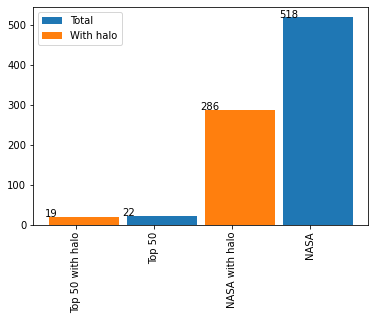

In [1411]:
barWidth = 0.9
bars1 = [22, 518]
bars2 = [19, 286]
bars4 = bars1+bars2

r1 = [2,4]
r2 = [1,3]
r4 = r1+r2

label = ['22', '518','19', '286']

plt.bar(r1, bars1, width = barWidth, label = 'Total')
plt.bar(r2, bars2, width = barWidth, label = 'With halo')

plt.legend()

plt.xticks([r + barWidth for r in range(len(r4))], ['Top 50 with halo','Top 50', 'NASA with halo', 'NASA'], rotation=90)

for i in range(len(r4)):
    plt.text(x = r4[i]-0.5 , y = bars4[i]+0.1, s = label[i], size = 10)

plt.show()

In [1412]:
#Description of Plot:
# The y-axis is the number of solar flares and x-axis has four types:
# Top 50 with halo','Top 50', 'NASA with halo', 'NASA'.
# Organe color means with Halo and blue means without Halo.
# The height represents the number.



In [1413]:
# Yes, flares in the top 50 tend to have Halo CMEs. Based on the graph, 
# the difference of height between top50 is much less than all data.
# Also, 19/22 = 0.86... and 286/518 = 0.552...
# Thus, flares in the top 50 tend to have Halo CMEs.
# Thus, we can conclude that as solar flares are stronger, there is more possibility that it is with Halo CME.